In [1]:
using DataFrames
import PyPlot as plt
import Seaborn as sns

include("../Engine/Engine.jl")
using .Engine

In [60]:
graphs, cascade, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_10_seeds_new/data.jld2");

In [3]:
graphs2, cascade2,df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_JDD_10_seeds/data.jld2");

In [77]:
graph = graph_by_majority_vote(graphs, 3)

between, between_actors = betweenness_centralities(graph, df, 0, "T to U")
in, in_actors = indegree_centralities(graph, df, 0, "T to U")
out, out_actors = outdegree_centralities(graph, df, 0, "T to U");

In [80]:
between_actors[3]

527-element Vector{String}:
 "MSNBC"
 "0 to 0 followers"
 "1054 to 880 followers"
 "121 to 90 followers"
 "1262 to 1054 followers"
 "1513 to 1262 followers"
 "157 to 121 followers"
 "17 to 0 followers"
 "17272 to 8111 followers"
 "1832 to 1513 followers"
 "198 to 157 followers"
 "2247 to 1832 followers"
 "245 to 198 followers"
 ⋮
 "verge"
 "voguemagazine"
 "voxdotcom"
 "waglenikhil"
 "washingtonpost"
 "wfaa"
 "williecolon"
 "womensmarch"
 "wto"
 "ycombinator"
 "zerohedge"
 "zittokabwe"

In [26]:
sort(unique(df.partition))

3-element Vector{String}:
 "After COP26"
 "Before COP26"
 "During COP26"

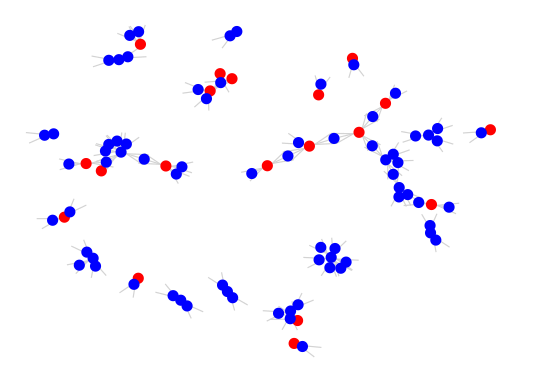

In [81]:
plot_graph(graph[3], df, 0, edge_type="T to U")

In [ ]:
sorting = argsort(between, reverse=true)
between = between[sorting]

In [ ]:
graphs2, cascades2, df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_10_seeds/data.jld2");

In [ ]:
graphs3, cascades3, df3 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_10_seeds_TEST/data.jld2");

In [ ]:
graphs4, casc4, df4 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_TE_10_seeds_TEST/data.jld2");

In [ ]:
graphs, cascades, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_10_seeds_TEST_2/data.jld2");

In [ ]:
graphs2, cascades2, df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_10_seeds_TEST/data.jld2");

In [ ]:
graphs3, cascades3, df3 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_JDD_10_seeds/data.jld2");

In [2]:
g, _, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_10_seeds_new/data.jld2");

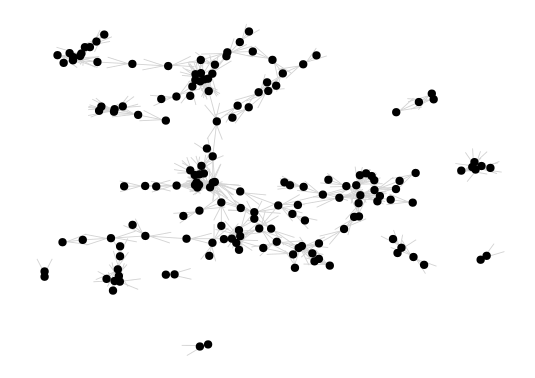

In [17]:
plot_graph(g[1][1], df, 0, edge_type="T to T", print_node_names=false)

In [3]:
g2, _, df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_TE_10_seeds_new/data.jld2");

In [ ]:
g3, _, df3 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_10_seeds/data.jld2");

In [24]:
g4, _, df4 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_TE_10_seeds/data.jld2");

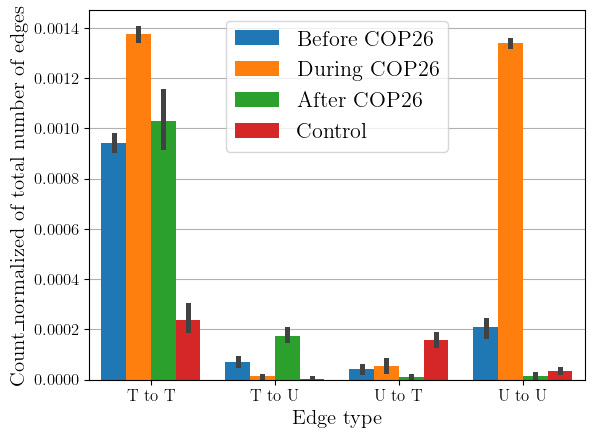

In [54]:
plot_edge_types([graphs, graphs2], [df, df2], [0,0], hue_order=["Before COP26", "During COP26", "After COP26", "Control"], y="count_normalized", log=false);

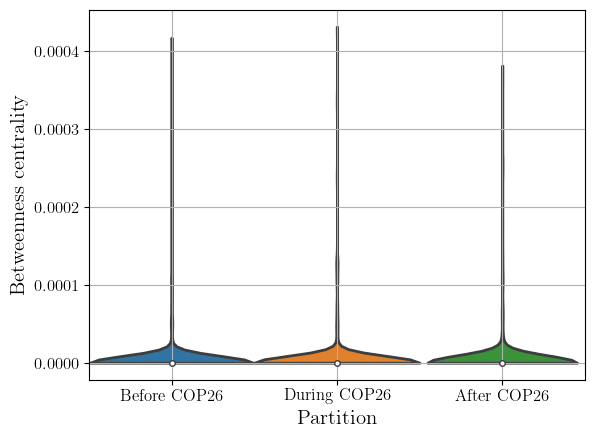

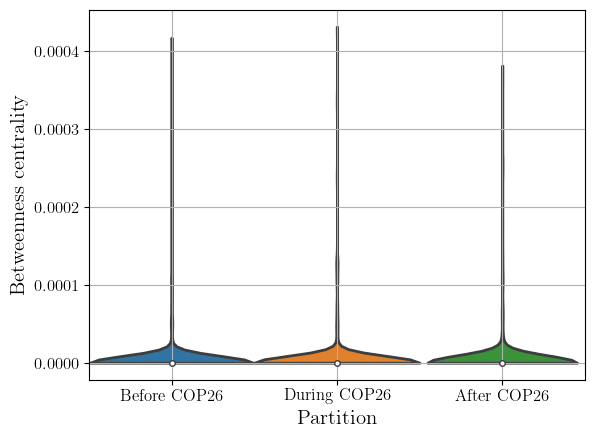

In [60]:
plot_betweenness_centrality(graphs[1], df);

In [ ]:
# Create simple graphs by removing weights not needed for the centrality
simplifier = x -> maximum(x) > cuttoff
simple_graphs = [SimpleDiGraph(simplifier.(graph)) for graph in influence_graphs]

betweenness = [betweenness_centrality(graph, normalize=true) for graph in simple_graphs]

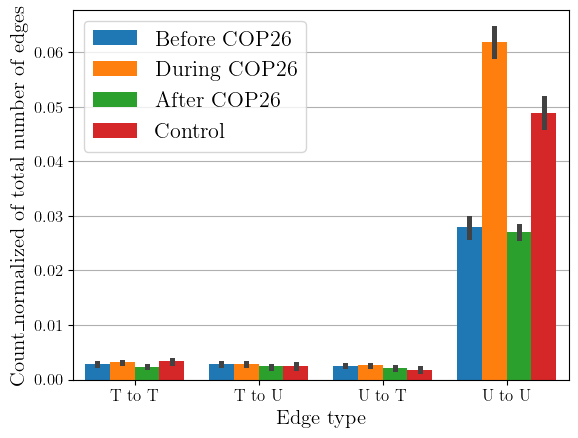

In [55]:
plot_edge_types([g, g2], [df, df2], [0,0], hue_order=["Before COP26", "During COP26", "After COP26", "Control"], y="count_normalized", log=false);

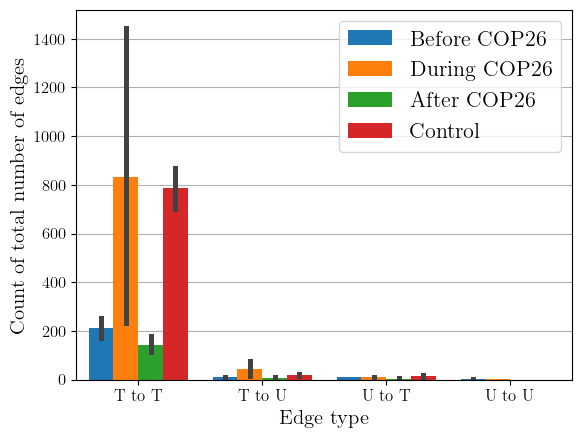

In [30]:
plot_edge_types([g3, g4], [df3, df4], [0,0], hue_order=["Before COP26", "During COP26", "After COP26", "Control"], y="count", log=false);

In [42]:
igg = InfluenceGraphGenerator(JointDistanceDistribution, threshold=1)

# x = rand(0:1, 200)
# y = rand(0:1, 200)

x = rand(200)
y = rand(200)

using BenchmarkTools

@btime igg.causal_function(x, y)

  123.449 ms (6912 allocations: 307.93 MiB)


0

In [46]:
N = 500
123.449*1e-3*N^2/60/60

8.57284722222222

In [44]:
a = [1, 0/0, 2]
using StatsBase
@btime minimum(a)

  52.792 ns (1 allocation: 16 bytes)


NaN

In [73]:
a = zeros(20000, 20000)
for i = 1:round(Int, 5e-5*20000^2)
    k = rand(1:20000, 1)[1]
    l = rand(1:20000, 1)[1]
    a[k,l] = 1.
end
a = SparseArrays.sparse(a)

# a = rand(20000, 20000)


b = rand(20000)

using BenchmarkTools

@btime sum(a .* b, dims=1)
# P = zeros(size(a)[1])
# @btime begin
#     for i = 1:size(a)[1]
#         P[i] = sum(a[i,:] .* b[i])
#     end
# end

  520.520 ms (24 allocations: 5.96 GiB)


1×20000 Matrix{Float64}:
 2.15342  0.367959  0.0  0.0  0.141787  …  1.52075  0.124957  0.795768

In [74]:
16/(520*1e-3)

30.769230769230766

In [5]:
@btime begin
    a = zeros(10000)
    for i = 1:length(a)
        @inbounds a[i] = 1
    end
end

  2.573 μs (2 allocations: 78.17 KiB)


In [13]:
import SparseArrays

foo = rand(3, 3)
foo[1,2] = 0
foo[2,2] = 0
foo[3,2] = 0
foo[3,1] = 0
s = SparseArrays.sparse(foo)

sum(s, dims=1)

1×3 Matrix{Float64}:
 1.1741  0.0  1.41692

In [12]:
foo

3×3 Matrix{Float64}:
 0.54011   0.0       0.476879
 0.728867  0.451301  0.154322
 0.0       0.278008  0.10493

In [3]:
Threads.nthreads()

1

In [48]:
N = length(unique(df.username))
1.878*1e-3*N^2/60/60

35607.018283921665

In [ ]:
plot_edge_types(graphs, df, 0, hue_order=["Before COP26", "During COP26", "After COP26"], y="count_normalized", log=true)

In [ ]:
plot_edge_types(graphs2, df2, 0, hue_order=["Before COP26", "During COP26", "After COP26"], y="count_normalized", log=true)

In [ ]:
plot_edge_types(graphs3, df3, 0, hue_order=["Before COP26", "During COP26", "After COP26"], y="count_normalized", log=true)

In [ ]:
foo = graph_by_majority_vote(graphs2)

In [ ]:
plot_edge_types(foo, df2, 0, hue_order=["Before COP26", "During COP26", "After COP26"], y="count_normalized", log=false);

In [ ]:
plot_edge_types([graphs3, graphs4], [df3, df4], [0, 0], hue_order=["Before COP26", "During COP26", "After COP26", "Control"], y="count_normalized", log=true);

In [ ]:
using Colors, Graphs, SimpleWeightedGraphs, GraphPlot

"""
Plot the graph corresponding to the matrix adjacency, for one type of edge (edges are matrices).
"""
function plot_graph2(adjacency::SingleInfluenceGraph, df::DataFrame, cuttoff::Real; edge_type::AbstractString = "Any edge", print_node_names::Bool = true)

    # Actors and actions are represented in the order they appear in sort(unique(df."actor")) in the adjacency matrix
    node_labels = sort(unique(df.actor))
    actions = sort(unique(df.action))

    edge_types = Matrix{String}(undef, length(actions), length(actions))
    for (i, a1) in enumerate(actions), (j, a2) in enumerate(actions)
        edge_types[i,j] = string(a1, " to ", a2)
    end

    simplifier = make_simplifier(edge_type, cuttoff, edge_types)

    # reduce the adjacency matrix containing edge matrices to simple adjacency matrix depending on which 
    # connection we are interested in in the edge matrices
    reduced_adjacency = simplifier.(adjacency)
    # for i = 1:size(reduced_adjacency)[1], j = 1:size(reduced_adjacency)[2]
    #     if reduced_adjacency[i, j] > 0 && reduced_adjacency[j, i] != reduced_adjacency[i, j]
    #         reduced_adjacency[j, i] = reduced_adjacency[i, j]
    #     end
    # end
    g = SimpleWeightedDiGraph(reduced_adjacency)
    # remove unconnected nodes from the drawing of the graph
    outdegrees = outdegree(g)
    indegrees = indegree(g)
    connected_vertices = [i for i in vertices(g) if (outdegrees[i] > 0 || indegrees[i] > 0)]
    connected_graph, vmap = induced_subgraph(g, connected_vertices)
    connected_vertices_labels = node_labels[vmap]

    # We draw aggregate actors as red nodes, and individuals as blue nodes
    regex = r"^[0-9]+ to [0-9]+ followers$"
    colors = Vector{RGB}(undef, length(connected_vertices_labels))
    for (i, label) in enumerate(connected_vertices_labels)
        if occursin(regex, label)
            colors[i] = colorant"red"
        else
            colors[i] = colorant"blue"
        end
    end

    # Plot only connected nodes
    if print_node_names
        gplot(connected_graph, nodefillc=colors, nodelabel=connected_vertices_labels, nodelabelc=colorant"white", layout=circular_layout)
    else
        gplot(connected_graph, nodefillc=colors, nodelabelc=colorant"white", layout=stressmajorize_layout) 
    end

end


plot_graph2(foo[1], df2, 0, edge_type="Any Edge", print_node_names=false)

In [ ]:
using Colors, Graphs, SimpleWeightedGraphs, GraphPlot

"""
Plot the graph corresponding to the matrix adjacency, for one type of edge (edges are matrices).
"""
function plot_graph2(adjacency::SingleInfluenceGraph, df::DataFrame, cuttoff::Real; edge_type::AbstractString = "Any edge", print_node_names::Bool = true)

    # Actors and actions are represented in the order they appear in sort(unique(df."actor")) in the adjacency matrix
    node_labels = sort(unique(df.actor))
    actions = sort(unique(df.action))

    edge_types = Matrix{String}(undef, length(actions), length(actions))
    for (i, a1) in enumerate(actions), (j, a2) in enumerate(actions)
        edge_types[i,j] = string(a1, " to ", a2)
    end

    simplifier = make_simplifier(edge_type, cuttoff, edge_types)

    # reduce the adjacency matrix containing edge matrices to simple adjacency matrix depending on which 
    # connection we are interested in in the edge matrices
    reduced_adjacency = simplifier.(adjacency)
    for i = 1:size(reduced_adjacency)[1], j = 1:size(reduced_adjacency)[2]
        if reduced_adjacency[i, j] > 0 && reduced_adjacency[j, i] != reduced_adjacency[i, j]
            reduced_adjacency[j, i] = reduced_adjacency[i, j]
        end
    end
    g = SimpleWeightedGraph(reduced_adjacency)
    # remove unconnected nodes from the drawing of the graph
    outdegrees = outdegree(g)
    indegrees = indegree(g)
    connected_vertices = [i for i in vertices(g) if (outdegrees[i] > 0 || indegrees[i] > 0)]
    connected_graph, vmap = induced_subgraph(g, connected_vertices)
    connected_vertices_labels = node_labels[vmap]

    # We draw aggregate actors as red nodes, and individuals as blue nodes
    regex = r"^[0-9]+ to [0-9]+ followers$"
    colors = Vector{RGB}(undef, length(connected_vertices_labels))
    for (i, label) in enumerate(connected_vertices_labels)
        if occursin(regex, label)
            colors[i] = colorant"red"
        else
            colors[i] = colorant"blue"
        end
    end

    # Plot only connected nodes
    if print_node_names
        gplot(connected_graph, nodefillc=colors, nodelabel=connected_vertices_labels, nodelabelc=colorant"white", layout=circular_layout)
    else
        x, y = spring_layout(connected_graph, MAXITER=100000, C=9)
        gplot(connected_graph, x, y, nodefillc=colors, nodelabelc=colorant"white") 
    end

end


plot_graph2(foo[1], df2, 0, edge_type="Any Edge", print_node_names=false)

In [ ]:
random_g = rand(0:1, 1000, 1000)
for i = 1:size(random_g)[1], j = 1:size(random_g)[2]
    if random_g[i, j] > 0 && random_g[j, i] != random_g[i, j]
        random_g[j, i] = random_g[i, j]
    end
end

g = SimpleWeightedGraph(random_g)
# remove unconnected nodes from the drawing of the graph
outdegrees = outdegree(g)
indegrees = indegree(g)
connected_vertices = [i for i in vertices(g) if (outdegrees[i] > 0 || indegrees[i] > 0)]
connected_graph, vmap = induced_subgraph(g, connected_vertices)

gplot(connected_graph, nodelabelc=colorant"white", layout=spring_layout, edgelinewidth=) 

In [ ]:
plot_edge_types([graphs, graphs2], [df, df2], [0, 0], hue_order=["Before COP26", "During COP26", "After COP26", "Control"], y="count_normalized", log=false);

In [ ]:
foo = graph_by_majority_vote(graphs3)

In [ ]:
plot_edge_types(graphs3, df3, 0, hue_order=["Before COP26", "During COP26", "After COP26"], y="count_normalized", log=false);

In [ ]:
plot_edge_types(graphs3,df3, 0, hue_order=["Before COP26", "During COP26", "After COP26"], y="count_normalized", log=false);

In [ ]:
indices2 = []
test = sum(graphs2)
for i = 1:length(test)
    for k = 1:size(test[i])[1], l = 1:size(test[i])[2]
        for m = 1:size(test[i][k,l])[1], n = 1:size(test[i][k,l])[2]
            if test[i][k,l][m,n] >= 4
                push!(indices2, (i,k,l,m,n))
            end
        end
    end
end

indices2

In [ ]:
indices = []
graphs = foo
for i = 1:length(graphs)
    for k = 1:size(graphs[i])[1], l = 1:size(graphs[i])[2]
        for m = 1:size(graphs[i][k,l])[1], n = 1:size(graphs[i][k,l])[2]
            if graphs[i][k,l][m,n] == -1.
                push!(indices, (i,k,l,m,n))
            end
        end
    end
end

In [ ]:
indices2 == indices

In [ ]:
test = combine(groupby(df, "partition"), "actor" => (x->length(unique(x))^2) => "count")

edges = edge_types(graphs, df, 0)
edges["prop"] = Vector{Float64}(undef, length(edges["count"]))
for (i,partition) in enumerate(test.partition)
    ind = edges["partition"] .== partition
    edges["prop"][ind] = edges["count"][ind] ./ test.count[i]
end

edges

In [ ]:
graphs3[1]

In [ ]:
edges2 = edge_types(graphs2, df2, 0)
edges2["prop"] = edges2["count"] ./ length(unique(df2.actor))^2;

In [ ]:
edges = Metrics.combine_dict([edges, edges2])

In [ ]:
function find_number(actors, actions)

    actors_ = unique(actors)
    actions_ = unique(actions)

    tot = Dict(["$a" => 0 for a in actions_])
    tot["remove"] = 0
    for actor in actors_

        indices = findall(actors .== actor)

        check = 0
        for a in actions_
            if any(actions[indices] .== a)
                tot["$a"] += 1
                check += 1
            end
        end

        if check == length(actions_)
            tot["remove"] += 1
        end
    end

    res = Dict()
    for a1 in actions_, a2 in actions_
        if a1 == a2
            res["$a1 to $a2"] = tot[a1] * (tot[a2] - 1)
        else
            res["$a1 to $a2"] = tot[a1] * tot[a2] - tot["remove"]
        end
    end
    return res

end


In [ ]:
test = combine(groupby(df, "partition"), ["actor", "action"] => find_number => "count")

edges = edge_types(graphs, df, 0)
edges["prop"] = Vector{Float64}(undef, length(edges["count"]))
for (i,partition) in enumerate(test.partition)
    for type in unique(edges["edge_type"])
        ind = edges["partition"] .== partition .&& edges["edge_type"] .== type
        edges["prop"][ind] = edges["count"][ind] ./ test.count[i][type]
    end
end

edges2 = edge_types(graphs2, df2, 0)
edges2["prop"] = Vector{Float64}(undef, length(edges2["count"]))
numbers = find_number(df2.actor, df2.action)
for type in unique(edges2["edge_type"])
    indx = edges2["edge_type"] .== type
    edges2["prop"][indx] = edges2["count"][indx] ./ numbers[type]
end


edges = Metrics.combine_dict([edges, edges2])

In [ ]:
import Seaborn as sns

sns.barplot(edges, x="edge_type", y="prop", hue="partition", hue_order=["Before COP27", "During COP27", "After COP27", "Control"], errorbar=x->(minimum(x), maximum(x)), log=true)

In [ ]:
plot_edge_types([graphs, graphs2], [df, df2], [0, 0], hue_order=["Before COP27", "During COP27", "After COP27", "Control"], y="count", log=false, errorbar=x->(minimum(x), maximum(x)));

In [ ]:
data = load_data("/Users/cyrilvallez/Desktop/COP27_JDD_10_seeds/data.jld2");
graphs3 = data["multiple_influence_graphs"];

In [ ]:
plot_edge_types([graphs3, graphs2], [df, df2], [0, 0], hue_order=["Before COP27", "During COP27", "After COP27", "Control"], y="count", log=false, errorbar=x->(minimum(x), maximum(x)));

In [ ]:
foo1 = edge_types(graphs, df, 0)
foo2 = edge_types(graphs3, df, 0)

In [ ]:
ind1 = foo1["edge_type"] .== "T to T" .&& foo1["partition"] .== "During COP27"
ind2 = foo2["edge_type"] .== "T to T" .&& foo2["partition"] .== "During COP27"

count1 = foo1["count"][ind1]
count2 = foo2["count"][ind2]

In [ ]:
count1

In [ ]:
graphs, cascade, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP27_TE_10_seeds/data.jld2");

In [ ]:
graphs2, cascade2, df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_TE_10_seeds/data.jld2");

In [ ]:
plot_edge_types([graphs, graphs2], [df, df2], [0, 0], hue_order=["Before COP27", "During COP27", "After COP27", "Control"], y="count", log=false);#, errorbar=x->(minimum(x), maximum(x)));

In [ ]:
edges = edge_types(graphs, df, 0)

ind = edges["edge_type"] .== "T to T" .&& edges["partition"] .== "During COP26"

count = edges["count"][ind]

In [ ]:
graphs, cascades, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_NoSurro/data.jld2")
graphs2, cascades2, df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_TE_NoSurro/data.jld2")

cuttoffs = collect(0:0.1:1.5)

edges = edge_types(graphs, df, cuttoffs[1])
edges["cuttoff"] = repeat([cuttoffs[1]], 12)
for cuttoff in cuttoffs[2:end]
    new_edges = edge_types(graphs, df, cuttoff)
    new_edges["cuttoff"] = repeat([cuttoff], 12)
    edges = Metrics.combine_dict([edges, new_edges])
end
# plot_edge_types([graphs, graphs2], [df, df2], [cuttoff, cuttoff], hue_order=["Before COP27", "During COP27", "After COP27", "Control"], y="count", log=false, errorbar=x->(minimum(x), maximum(x)));

In [ ]:
import Seaborn as sns


sns.lineplot(data=edges, x="cuttoff", y="count", hue="edge_type")

In [ ]:
graphs, cascades, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_NoSurro/data.jld2")
graphs2, cascades2, df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_TE_NoSurro/data.jld2")

cuttoffs = collect(0:0.1:1.5)
TT = []
UU = []
UT = []
TU = []

for cuttoff in cuttoffs
    edges = edge_types(graphs, df, cuttoff)


In [ ]:
edges = edge_types(graphs, df, cuttoffs[1])

In [ ]:
graphs, cascades, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_NoSurro/data.jld2")
# graphs2, cascades2, df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_TE_NoSurro/data.jld2")

cuttoffs = collect(0:0.01:0.1)

dics = [Vector{Dict}(), Vector{Dict}(), Vector{Dict}(), Vector{Dict}()]
for cuttoff in cuttoffs
    edges = edge_types(graphs, df, cuttoff)
    for (i, edge) in enumerate(sort(unique(edges["edge_type"])))
        indices = edges["edge_type"] .== edge
        new = Dict()
        new["cuttoff"] = [cuttoff, cuttoff, cuttoff]
        new["proportion"] = edges["proportion"][indices]
        new["partition"] = edges["partition"][indices]
        new["count"] = edges["count"][indices]

        push!(dics[i], new)
    end
end

combined = [Metrics.combine_dict(dics[i]) for i = 1:4];


In [ ]:
import PyPlot as plt
import Seaborn as sns

edges = edge_types(graphs, df, cuttoffs[1])
types = sort(unique(edges["edge_type"]))
index = 1

plt.figure()
sns.lineplot(data=combined[index], x="cuttoff", y="count", hue="partition", hue_order=["Before COP26", "During COP26", "After COP26"])
plt.title(types[index])
plt.yscale("log")
plt.gcf()

In [ ]:
function edge_types2(influence_graphs::InfluenceGraphs, df::DataFrame, cuttoff::Real) 

    # Actions and partitions are represented in the order they appear in sort(unique(df)) in the adjacency matrix
    actions = sort(unique(df.action))
    partitions = sort(unique(df.partition))

    # Small hack to rename the case when there are no partitions
    if partitions == ["Full dataset"]
        partitions = ["Control"]
    end

    N_actions = length(actions)
    N_partitions = length(partitions)

    edge_types = [string(n1, " to ", n2) for n1 in actions for n2 in actions]

    edge_number = Matrix{Int}(undef, N_partitions, N_actions^2)
    reachable_edge_number = Matrix{Int}(undef, N_partitions, N_actions^2)

    for (k, adjacency) in enumerate(influence_graphs)
        linear_index = 0
        for i = 1:N_actions, j = 1:N_actions
            linear_index += 1
            is_edge = x -> (x[i, j] > -0.1 && x[i, j] < cuttoff)
            is_reachable = x -> (x[i, j] != -1)
            edge_number[k, linear_index] = sum(is_edge.(adjacency))
            reachable_edge_number[k, linear_index] = sum(is_reachable.(adjacency))
        end
    end

    # Compute the proportion of each edges
    edge_proportion = edge_number ./ sum(edge_number, dims=2)

    # Normalize by reachable edges
    edge_number_normalized = edge_number ./ reachable_edge_number

    # Reshape everything into a dictionary
    partition = vcat([[partitions[i] for k = 1:N_actions^2] for i = 1:N_partitions]...)
    edges = repeat(edge_types, N_partitions)
    # Reshape the adjoint to reshape row wise
    count = reshape(edge_number', :)
    count_normalized = reshape(edge_number_normalized', :)
    proportion = reshape(edge_proportion', :)
    data = Dict("partition" => partition, "edge_type" => edges, "count" => count, "count_normalized" => count_normalized, "proportion" => proportion)

    return data

end

In [ ]:
indices1 = []
indices2 = []
val = []
g = graphs_JDD
for i = 1:length(g)
    for k = 1:size(g[i])[1], l = 1:size(g[i])[2]
        for m = 1:size(g[i][k,l])[1], n = 1:size(g[i][k,l])[2]
            push!(val, g[i][k,l][m,n])
            if g[i][k,l][m,n] > -0.1 && g[i][k,l][m,n] < 1e-5
                push!(indices1, g[i][k,l][m,n])
            end
            if g[i][k,l][m,n] == -2
                push!(indices2, (i,k,l,m,n))
            end
        end
    end
end


In [ ]:
length(indices2)

In [ ]:
test = -1
if test > -0.1 && test < 1e-5
    print("salope")
end

In [ ]:
foo = 0/0

In [ ]:
graphs_JDD, _, df_jdd = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_JDD_NoSurro/data.jld2")
cuttoffs = [1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5]

dics = [Vector{Dict}(), Vector{Dict}(), Vector{Dict}(), Vector{Dict}()]
for cuttoff in cuttoffs
    edges = edge_types2(graphs_JDD, df_jdd, cuttoff)
    for (i, edge) in enumerate(sort(unique(edges["edge_type"])))
        indices = edges["edge_type"] .== edge
        new = Dict()
        new["cuttoff"] = [cuttoff, cuttoff, cuttoff]
        new["proportion"] = edges["proportion"][indices]
        new["partition"] = edges["partition"][indices]
        new["count"] = edges["count"][indices]

        push!(dics[i], new)
    end
end

combined = [Metrics.combine_dict(dics[i]) for i = 1:4];

In [ ]:
import PyPlot as plt
import Seaborn as sns

edges = edge_types2(graphs_JDD, df_jdd, cuttoffs[1])
types = sort(unique(edges["edge_type"]))
index = 1

plt.figure()
sns.lineplot(data=combined[index], x="cuttoff", y="count", hue="partition", hue_order=["Before COP26", "During COP26", "After COP26"])
plt.title(types[index])
plt.yscale("log")
plt.xscale("log")
plt.gcf()

In [ ]:
plt.close("all")

In [ ]:
flat = collect(Iterators.flatten(Iterators.flatten(graphs)))
flat = flat[flat .!= -1];

In [ ]:
using StatsBase

quantile(flat, 0.999)

In [ ]:
length(flat)

In [ ]:
(1-0.999)*length(flat)

In [ ]:
sum(flat .!= -1.)

In [ ]:
sum(tot)

In [ ]:
function find_number(actors, actions)

    actors_ = unique(actors)
    actions_ = unique(actions)

    tot = Dict(["$a" => 0 for a in actions_])
    tot["remove"] = 0
    for actor in actors_

        indices = findall(actors .== actor)

        check = 0
        for a in actions_
            if any(actions[indices] .== a)
                tot["$a"] += 1
                check += 1
            end
        end

        if check == length(actions_)
            tot["remove"] += 1
        end
    end

    res = Dict()
    for a1 in actions_, a2 in actions_
        if a1 == a2
            res["$a1 to $a2"] = tot[a1] * (tot[a2] - 1)
        else
            res["$a1 to $a2"] = tot[a1] * tot[a2] - tot["remove"]
        end
    end
    return res

end

test = combine(groupby(df, "partition", sort=true), ["actor", "action"] => find_number => "count")

tot = []
for dic in test.count
    push!(tot, sum(collect(values(dic))))
end

tot

In [ ]:
flat = flat[flat .!= -1]

In [ ]:
maximum(flat)

In [ ]:
354^2*4 + 403^2*4 + 278^2*4

In [ ]:
3*527^2*4

In [ ]:
test = combine(groupby(df, "partition"), "actor" => (x->length(unique(x))) => "count")

In [ ]:
size(graphs[1])

In [ ]:
function test12(df::DataFrame)

	# Get indices resulting on the unique values of df."username"
	x = df."username"
	indices = unique(i -> x[i], 1:length(x))
	# Get unique usernames and corresponding follower_count
	users = x[indices]
	followers = df."follower_count"[indices]

	# sort the users in desending order of follower_count
	sorting = sortperm(followers, rev=true)
	followers = followers[sorting]
	users = users[sorting]

    return users, followers
	# M = length(users)
	# actors = Vector{String}(undef, M)
	# N = 500
	# for i = 1:N
	# 	actors[i] = users[i]
	# end

	# L = 10000
	# N += 1
	# while true
	# 	if N + L <= M
	# 		actors[N:(N+L)] .= "$(followers[N]) to $(followers[N+L]) followers"
	# 	else
	# 		actors[N:end] .= "$(followers[N]) to $(followers[end]) followers"
	# 		break
	# 	end
	# 	N += L
	# end

	# actor_dict = Dict(zip(users, actors))
	# df = transform(df, "username" => ByRow(x -> actor_dict[x]) => "actor")
	# return df
end

users, followers = test12(df)


In [ ]:
quantile(followers, 0.99)

In [ ]:
followers[2000]

In [ ]:
thresholds = 0:0.01:0.06
limits = ["x->-1000", "x->quantile(x, 0.5)", "x->quantile(x, 0.75)", "x->quantile(x, 0.9)", "x->quantile(x, 1)", "x->2*quantile(x, 1)", "x->4*quantile(x, 1)"]
labels = ["None", "Q(0.5)", "Q(0.75)", "Q(0.9)", L"\max", L"2\cdot \max", L"4\cdot \max"]

result = Matrix{Matrix{Float64}}(undef, length(limits), length(thresholds))
for i in eachindex(result)
    result[i] = Matrix{Float64}(undef, N_redo_all, N_redo_surro)
end


for (k, seed_all) in ProgressBar(enumerate(seeds_all), "All TE", leave=true)

    Random.seed!(seed_all)
    X = reduce(vcat, [sample([0,1], AnalyticWeights([0.9, 0.1]), 200)' for i = 1:N])
    Y = zeros(size(X))
    Y[:, 1] = 0.5*X[:, 1] + X[:, 2]
    Y[:, end] = 0.5*X[:, end] + X[:, end-1]
    Y[:, 2:end-1] = 0.5*X[:, 2:end-1] + X[:, 1:end-2] + X[:, 3:end]


    for (l, seed_surro) in ProgressBar(enumerate(seeds_surro), "Seeds", leave=false)

        for (i, limit) in ProgressBar(enumerate(limits), "Limits", leave=false)
            for (j, threshold) in ProgressBar(enumerate(thresholds), "Thresholds", leave=false)

                igg = InfluenceGraphGenerator(SimpleTE, threshold=threshold, limit=limit, seed=seed_surro)
                tot = 0

                for idx in ProgressBar(1:N, leave=false)
                    if igg.causal_function(X[idx, :], Y[idx, :]) == 1
                        tot += 1
                    end  
                end

                result[i,j][k,l] = tot/N

            end
        end

    end

end

save_data(result, path * "_TE.jld2")

mean_value = Matrix{Float64}(undef, size(result))
for i in eachindex(result)
    mean_value[i] = mean(result[i])
end

# Set vmin a little lower than minimum, so that 0 appears on a color scale lower than minimum when using clip=true
if any(mean_value .== 0)
    vmin = minimum(mean_value[mean_value .!= 0])/2
else
    vmin = minimum(mean_value)
end

plt.figure(figsize=[6.4, 4.8].*1.2)
sns.heatmap(mean_value, annot=true, cmap="rocket_r", norm=plt.matplotlib.colors.LogNorm(vmin=vmin, clip=true))
plt.xlabel("Threshold")
plt.ylabel("Limit value")
xloc, xlabels = plt.xticks()
plt.xticks(xloc, thresholds)
yloc, ylabels = plt.yticks()
plt.yticks(yloc, labels, rotation="horizontal")
plt.savefig(path * "_TE.pdf", bbox_inches="tight")
plt.gcf()